# Demo No. 3 - Surface geometry

This demo will guide you trough building of the complete model of component's surfaces and it will demonstrate how to acces basic parameters of stellar surfaces. As usual, we will start with defining the binary system:

In [1]:
from elisa.binary_system.system import BinarySystem
from elisa.base.star import Star
from astropy import units as u


primary = Star(
    mass=2.15 * u.solMass,
    surface_potential=3.6,
    synchronicity=1.0,
    t_eff=10000 * u.K,
    gravity_darkening=1.0,
    discretization_factor=10,  # angular size (in degrees) of the surface elements, default value is 3
    albedo=0.6,
    metallicity=0.0,
)

secondary = Star(
    mass=1.2 * u.solMass,
    surface_potential=4.0,
    synchronicity=1.0,
    t_eff=7000 * u.K,
    gravity_darkening=1.0,
    # discretization_factor=20,
    albedo=0.6,
    metallicity=0,
)

bs = BinarySystem(
    primary=primary,
    secondary=secondary,
    argument_of_periastron=58 * u.deg,
    gamma=-30.7 * u.km / u.s,
    period=2.5 * u.d,
    eccentricity=0.2,
    inclination=85 * u.deg,
    primary_minimum_time=2440000.0 * u.d,
    phase_shift=0.0,
)

2020-01-17 16:04:22,574 - 11807 - binary_system.system - INFO: initialising object BinarySystem
2020-01-17 16:04:22,586 - 11807 - binary_system.system - INFO: setting discretization factor of secondary component to 15.59 as a according to discretization factor of the primary component andconfiguration boundaries


Suppose, that we want to investigate surface geometry of the binary system `bs` at the following phase:

In [2]:
phase = 0.2

Lets then calculate orbital position for such photometric phase (see Demo No. 2):

In [3]:
position = bs.calculate_orbital_motion(phase)[0]  # [0] at the end due to the fact that this function always returns list of positions
position

Position(idx=0.0, distance=1.0496298780877449, azimuth=3.024214951767732, true_anomaly=2.0119239856110207, phase=0.2)

Surface geometry of components is being calculated and stored in separate containers for each orbital position. Therefore we will now initialize the container where we will store our surface geometry:

In [4]:
from elisa.binary_system.container import OrbitalPositionContainer

orbital_position_container = OrbitalPositionContainer.from_binary_system(bs, position)

Once the container is initilized, we can build the surface using following command:

In [6]:
orbital_position_container.build()

## Accessing the surface data

Surface of the both component is now fully constructed. Now we can access all parameters connected with surface of the components. We can start with surface points which we can access with following:

In [7]:
orbital_position_container.secondary.points

array([[ 8.46677935e-01,  0.00000000e+00,  1.24272224e-17],
       [ 1.25148442e+00,  2.47200517e-17,  1.23600259e-17],
       [ 8.55384070e-01,  5.70357154e-02,  1.23962610e-17],
       [ 8.80356783e-01,  1.08785213e-01,  1.23208846e-17],
       [ 9.18753041e-01,  1.51039921e-01,  1.22375561e-17],
       [ 9.67022651e-01,  1.80884595e-01,  1.21763384e-17],
       [ 1.02138837e+00,  1.96423970e-01,  1.21511808e-17],
       [ 1.07789732e+00,  1.96604342e-01,  1.21623390e-17],
       [ 1.13240650e+00,  1.81255523e-01,  1.22013076e-17],
       [ 1.18069076e+00,  1.51252317e-01,  1.22547648e-17],
       [ 1.21872107e+00,  1.08668312e-01,  1.23076445e-17],
       [ 1.24308860e+00,  5.68046063e-02,  1.23460313e-17],
       [ 1.01229730e+00,  3.73325792e-02,  1.89274998e-01],
       [ 1.04962988e+00,  5.27952582e-02,  1.89271479e-01],
       [ 1.08700456e+00,  3.73746863e-02,  1.89488479e-01],
       [ 9.49558290e-01,  4.81919370e-02,  1.63501147e-01],
       [ 9.80531290e-01,  8.66468892e-02

which returns 2D n x 3 numpy array of surface points in SMA units placed in corotating cartesian reference frame centered on the primary component with x-axis intersecting centre of the secondary component. Surface points mesh can be also visualized with following function:

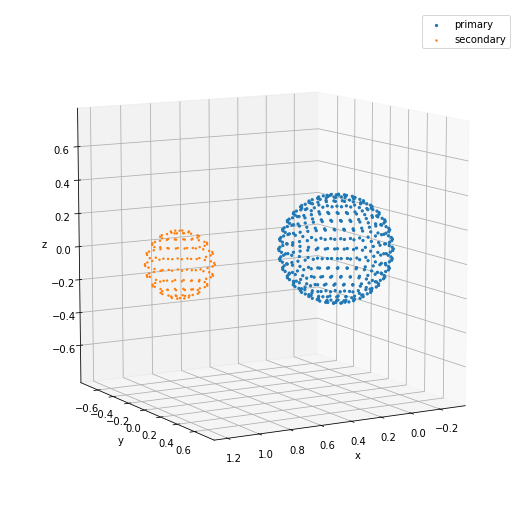

In [8]:
bs.plot.mesh(
    phase=phase, 
    azimuth=60*u.deg,  # angle of view
    inclination = 80*u.deg,  # elevation of line of sight vector
)

Surface points were triangulated using Delaunay triangulation and the coresponding triangles (simplices) can be accessed in the form of N x 3 numpy array of indices, where N is number of faces on the surface and each triplet is pointing to corresponding face triangle vertex.

In [9]:
orbital_position_container.secondary.faces

array([[ 40,  11,   1],
       [  2,  48,   0],
       [ 13,  14,  44],
       [ 18,  13,  14],
       [ 18,  13,  17],
       [ 39,  40,  41],
       [ 39,  40,  11],
       [ 25,  35,  26],
       [ 25,  18,  26],
       [ 25,  18,  17],
       [ 31,  22,  21],
       [ 38,  11,  10],
       [ 38,  39,  11],
       [ 46,  47,  21],
       [ 34,   6,   7],
       [ 34,  35,   7],
       [ 34,   6,   5],
       [ 34,  33,   5],
       [ 34,  25,  35],
       [ 19,  18,  26],
       [ 19,  18,  14],
       [ 29,  38,  28],
       [ 29,  38,  39],
       [ 29,  39,  41],
       [ 29,  42,  41],
       [ 29,  20,  28],
       [ 29,  42,  20],
       [ 12,  45,  44],
       [ 12,  13,  44],
       [ 12,  13,  17],
       [ 12,  16,  17],
       [ 24,  33,  23],
       [ 24,  16,  23],
       [ 24,  25,  17],
       [ 24,  34,  25],
       [ 24,  34,  33],
       [ 24,  16,  17],
       [ 30,  31,  21],
       [ 31,   2,   3],
       [ 30,  31,   2],
       [ 30,  47,  21],
       [ 30,   2

Faces can be also visualized in form of the wireframe model:

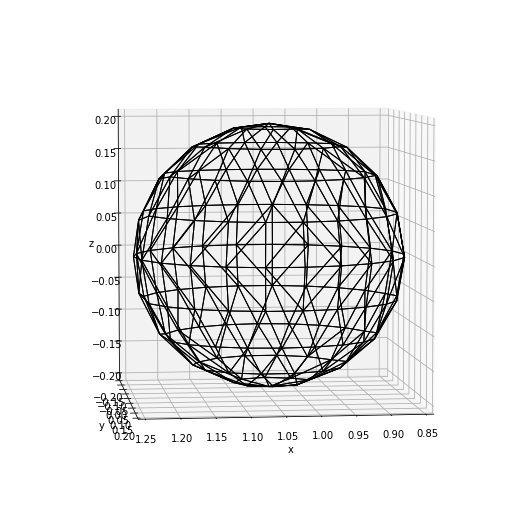

In [10]:
bs.plot.wireframe(
    phase=phase,
    components_to_plot='secondary', 
)

or similarly:

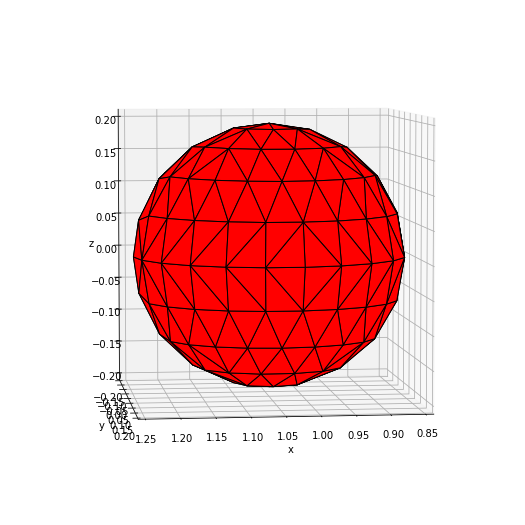

In [11]:
bs.plot.surface(
    phase=phase,
    components_to_plot='secondary',
    edges=True
)

Finally, surface parameters such as gravitational acceleration or effective temperature for each face on the surface:

In [12]:
# secondary.log_g  # (log(SI))
orbital_position_container.secondary.temperatures

array([6897.64460924, 7374.44952631, 7086.8079914 , 7076.76819217,
       7076.71679553, 6925.76642767, 6906.9558039 , 7032.15000639,
       7047.25639497, 7062.74211145, 7279.23623339, 6920.22039075,
       6918.68340517, 7249.65011141, 7021.36317851, 7021.37777049,
       7062.93898723, 7064.57842199, 7032.93521534, 7047.91492698,
       7063.43514831, 6964.62718241, 6941.8523898 , 6947.07091345,
       6981.15040442, 6995.02152704, 7006.25515387, 7106.10996841,
       7095.42549808, 7100.4353154 , 7097.52589699, 7116.56905156,
       7102.84290253, 7065.69209753, 7054.68423144, 7068.57146881,
       7109.37316364, 7284.26455866, 7324.08886912, 7327.13224906,
       7323.15638834, 7375.32161207, 7325.31085776, 7243.15279725,
       7245.61493323, 7138.84071377, 7149.09293019, 7150.46448386,
       7203.9660707 , 7218.69501476, 7016.24849045, 7005.60748207,
       7001.22711581, 7216.31649774, 7236.54093961, 7162.14489   ,
       7182.94541666, 7145.41191296, 7131.78510037, 7166.32102

Of course, we can visualize them in the surface plot:

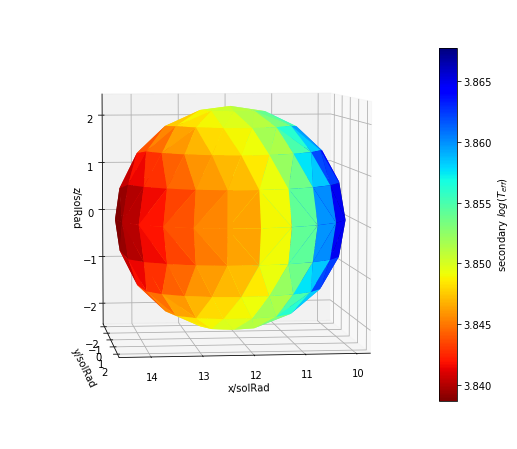

In [15]:
bs.plot.surface(
    phase=phase,
    colormap='temperature',
#     colormap='gravity_acceleration',
    components_to_plot='secondary',
    units='cgs',
    scale='log',
#     normals=True,
    axis_unit=u.solRad,
)